Getting the similarites from dandelion api - 

In [2]:
!pip install paralleldots

In [3]:
import paralleldots

In [1]:
api_key = None # use your api_key

In [ ]:
paralleldots.set_api_key( api_key )

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('Text_Similarity_Dataset.csv')

In [10]:
data.head()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...


We only have 1000 api requests per day for free account

In [11]:
use = data.iloc[:1000,:]

In [12]:
len(use)

1000

In [13]:
use.head()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...


In [14]:
text1, text2 = use.text1[0] , use.text2[0]

In [15]:
text1

'savvy searchers fail to spot ads internet search engine users are an odd mix of naive and sophisticated  suggests a report into search habits.  the report by the us pew research center reveals that 87% of searchers usually find what they were looking for when using a search engine. it also shows that few can spot the difference between paid-for results and organic ones. the report reveals that 84% of net users say they regularly use google  ask jeeves  msn and yahoo when online.  almost 50% of those questioned said they would trust search engines much less  if they knew information about who paid for results was being hidden. according to figures gathered by the pew researchers the average users spends about 43 minutes per month carrying out 34 separate searches and looks at 1.9 webpages for each hunt. a significant chunk of net users  36%  carry out a search at least weekly and 29% of those asked only look every few weeks. for 44% of those questioned  the information they are looking

In [16]:
text2

'newcastle 2-1 bolton kieron dyer smashed home the winner to end bolton s 10-game unbeaten run.  lee bowyer put newcastle ahead when he fed stephen carr on the right flank  then sprinted into the area to power home a header from the resultant cross. wanderers hit back through stelios giannakopoulos  who ended a fluid passing move with a well-struck volley. but dyer had the last word in a game of few chances  pouncing on a loose ball after alan shearer s shot was blocked and firing into the top corner. neither side lacked urgency in the early stages of the game  with plenty of tackles flying in  but opportunities in front of goal were harder to come by. bolton keeper jussi jaaskelainen had to make two saves in quick succession midway through the first-half - keeping out shearer s low shot and dyer s close-range header - but that was the only goalmouth action of note. and it was almost out of nothing that the magpies took the lead on 35 minutes. bowyer found space with a neat turn on the

In [26]:
Responses = []

In [19]:
response=paralleldots.similarity(text1,text2)
print(response)

{'similarity_score': 0.9060941339}


In [27]:
Responses.append(response['similarity_score'])

In [28]:
Responses

[0.9060941339]

In [53]:
%%time
for i in range(1, 900):
    text1, text2 = use.text1[i] , use.text2[i]
    try:
        response=paralleldots.similarity(text1,text2)
        Responses.append(response['similarity_score'])
    except Exception as e:
        print("Error occured =",e,'\n',"next time start using 'use' from index", 'i = ', i)
        print("Exceeded api call limits (most probably)")
        break

Error occured = 'similarity_score' 
 next time start using 'use' from index i =  60
Exceeded api call limits (most probably)
CPU times: user 1.44 s, sys: 52.7 ms, total: 1.5 s
Wall time: 2min 3s


In [54]:
len(Responses)

60

In [55]:
print(Responses)

[0.9060941339, 0.8997205496, 0.9109352827, 0.8853136301, 0.9468028545, 0.8938313723, 0.8648495674, 0.928632319, 0.9245663285, 0.9189122915, 0.835149467, 0.8609831333, 0.8911691904, 0.9193562269, 0.9081383348, 0.9279174805, 0.8869181275, 0.8900231123, 0.9305593371, 0.8835086226, 0.897320509, 0.8960603476, 0.8927966952, 0.8786811829, 0.9135963917, 0.8804848194, 0.8520516753, 0.9198538065, 0.8723273873, 0.9172518253, 0.9009159803, 0.8628129959, 0.9385611415, 0.8825110793, 0.8924764991, 0.8990312219, 0.900003016, 0.8895181417, 0.8600161672, 0.894748807, 0.8891957402, 0.8881371021, 0.8991033435, 0.904674232, 0.9234793782, 0.897731781, 0.8852865696, 0.8593286872, 0.9049049616, 0.855605185, 0.8962191343, 0.8851081133, 0.8800122738, 0.9069120884, 0.8880828619, 0.8958271742, 0.8608590364, 0.8774336576, 0.9226856232, 0.8905217052]


In [59]:
import numpy as np

In [60]:
np.save('paralleldots',np.array(Responses))

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

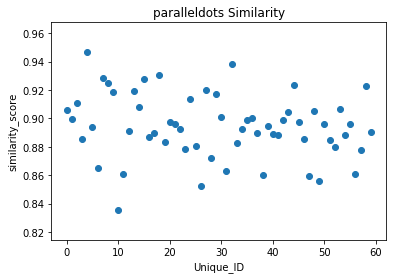

In [58]:
x = np.array(data.Unique_ID[:60])
y = Responses
plt.scatter(x,y)
plt.title("paralleldots Similarity")
plt.xlabel("Unique_ID")
plt.ylabel("similarity_score")
plt.show()

In [1]:
import urllib

In [2]:
import json

## API Parameters

In [22]:
lang = 'en'

In [ ]:
url_text = 'https://api.dandelion.eu/datatxt/sim/v1/?text1=Cameron%20wins%20the%20Oscar &text2=All%20nominees%20for%20the%20Academy%20Awards&token=<YOUR_TOKEN>'

In [ ]:
url = ' https://api.dandelion.eu/datatxt/sim/v1/?text1=Cameron%20wins%20the%20Oscar &text2=All%20nominees%20for%20the%20Academy%20Awards&token=<YOUR_TOKEN>'